In [1]:
#%matplotlib notebook

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import sem

In [3]:
#set variables for data files
mouse_metadata = os.path.join("Resources", "mouse_metadata.csv")
study_files = os.path.join("Resources", "study_results.csv")

#read the csv files
mouse_metadata = pd.read_csv(mouse_metadata)
study_files = pd.read_csv(study_files)
mouse_metadata.head()

#combine the data sets into one
data_df = pd.merge(mouse_metadata, study_files, on="Mouse ID")
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#testing the counts and various numbers so I can check against my functions below
#keep for now, delete for final output

drug_types = data_df["Drug Regimen"].unique()
print(drug_types)

drug_counts = data_df["Drug Regimen"].value_counts()
print(drug_counts)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64


In [5]:
#Summary Statistics
#generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

#generate stats
tumor_mean = data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

#place into a summary table
tumor_vol_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variance": tumor_variance,
                                 "Standard Deviant": tumor_std,
                                 "Standard Error": tumor_sem})
tumor_vol_stats_df

,Mean,Median,Variance,Standard Deviant,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


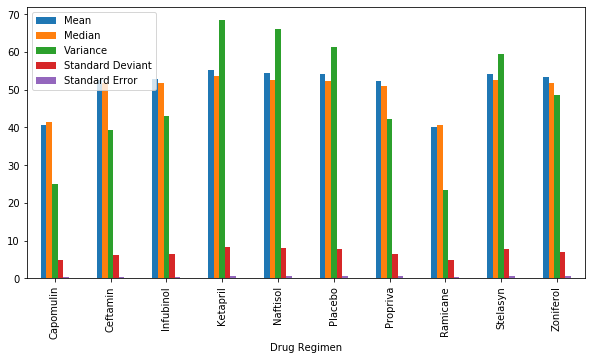

In [6]:
#use Pandas to create a bar plot with the above data
multi_stats = tumor_vol_stats_df.plot(kind="bar", figsize=(10,5))

plt.show()

In [7]:
#use Matplotlib to create a bar plot with the same data







In [8]:
#Create pie charts (one using Pandas, the other Matplotlib) to show the mice gender distribution in the study

#the total number of mice
total_mice = len(data_df["Mouse ID"].unique())
#delete print command
print(total_mice)

#removing duplicate "Mouse ID" rows
gender_df = data_df.loc[:, ["Mouse ID", "Sex"]]
gender_df = gender_df.drop_duplicates()

#find the total of males and females
gender_total = gender_df["Sex"].value_counts()
#delete print and type commands
print(gender_total)
type(gender_total)

gender_df = pd.DataFrame({"Gender": gender_total})
#delete below
gender_df


249
Male      125
Female    124
Name: Sex, dtype: int64


,Gender
Male,125
Female,124


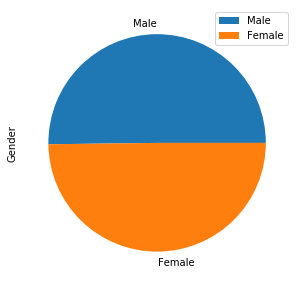

In [9]:
#generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = gender_df.plot.pie(y="Gender", figsize=(5,5))

([<matplotlib.patches.Wedge at 0x1f085bf2dc8>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

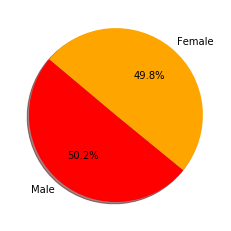

In [10]:
#generate a pie plot showing the distribution of female versus male mice using matplotlib
labels = ["Male", "Female"]
colors = ["red", "orange"]
sizes = gender_total
#explode = (0.1, 0)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [11]:
#calculate the final tumor volume of each mouse across four of the most promising treatment regimens
#calculate the IQR and quantitatively determine if there are any potential outliers

#first group my data by Timepoint and Drug Regimen
#then look at Tumor Volume
grouped_df = data_df.groupby(["Drug Regimen", "Timepoint"])
MeanTumorVolume = grouped_df["Tumor Volume (mm3)"].mean()

#create dataframe from the series created above
MeanTumorVolume_df = pd.DataFrame(MeanTumorVolume)

#need Drug Regimen & Timepoint as columns, so reset index
MeanTumorVolume_df = MeanTumorVolume_df.reset_index()
MeanTumorVolume_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [12]:
#reformat in order to find four 'best' drug treatments and for future plotting (?????? on the future plotting)
pivot_MeanTumorVolume_df = MeanTumorVolume_df.pivot(index="Timepoint", columns="Drug Regimen", values="Tumor Volume (mm3)")
pivot_MeanTumorVolume_df

#4 'best' treatments: Ramicane, Capomulin, Ceftamin, Infubinol

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
#calculate the final tumor volume of each mouse across four of the most promising treatment regimens
top_four = pivot_MeanTumorVolume_df[["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]]
top_four
#calculate the IQR and quantitatively determine if there are any potential outliers. 

Drug Regimen,Ramicane,Capomulin,Ceftamin,Infubinol
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,43.944859,44.266086,46.503051,46.541247
10,42.531957,43.084291,48.285125,49.403909
15,41.495061,42.064317,50.094055,51.296397
20,40.238325,40.716325,52.157049,53.197691
25,38.974300,39.939528,54.287674,55.715252
30,38.703137,38.769339,56.769517,58.299397
35,37.451996,37.816839,58.827548,60.742461
40,36.574081,36.958001,61.467895,63.162824


In [20]:
ramicane_result = top_four.iloc[9, 0]
capomulin_result = top_four.iloc[9, 1]
ceftamin_result = top_four.iloc[9, 2]
infubinol_result = top_four.iloc[9, 3]

results_df = pd.DataFrame({"Ramicane": [ramicane_result],
                           "Capomulin": [capomulin_result],
                           "Ceftamin": [ceftamin_result],
                           "Infubinol": [infubinol_result]})
results_df

,Ramicane,Capomulin,Ceftamin,Infubinol
0,34.955595,36.236114,64.132421,65.755562


In [15]:
MeanTumorVolume_df = MeanTumorVolume_df.rename(columns={"Drug Regimen": "Drug"})
MeanTumorVolume_df

drugs = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]
MeanTumorVolume_df.Drug.isin(drugs)
top_drugs = MeanTumorVolume_df[MeanTumorVolume_df.Drug.isin(drugs)]
top_drugs.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [23]:
end_time = top_drugs["Timepoint"] == 45
final_tumor = top_drugs[end_time]
final_tumor

,Drug,Timepoint,Tumor Volume (mm3)
9,Capomulin,45,36.236114
19,Ceftamin,45,64.132421
29,Infubinol,45,65.755562
79,Ramicane,45,34.955595


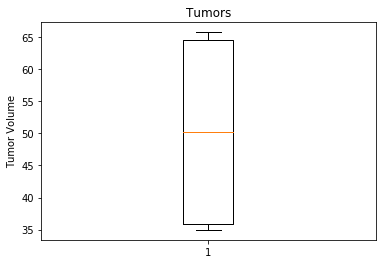

In [24]:
volumes = final_tumor["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(volumes)
plt.show()

In [25]:
quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 35.915984048
The upper quartile of temperatures is: 64.53820657155983
The interquartile range of temperatures is: 28.622222523559827
The the median of temperatures is: 50.18426756807692 
Values below -7.017349737339742 could be outliers.
Values above 107.47154035689957 could be outliers.
